In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
movie_rating = pd.read_csv('movie rating.csv')
movie_rating

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [3]:
movie_rating.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 
                        'BudgetMillions', 'Year']
movie_rating.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
movie_rating.Film = movie_rating.Film.astype('category')
movie_rating.Genre = movie_rating.Genre.astype('category')

In [5]:
movie_rating.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

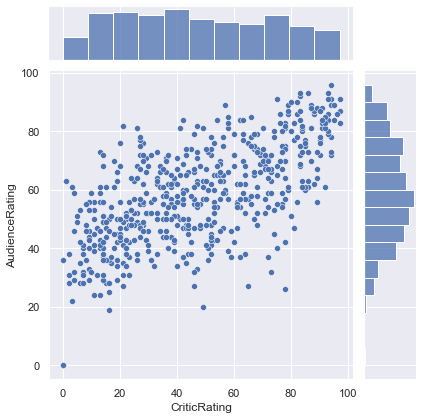

In [6]:
#Jointplots
j = sns.jointplot(data = movie_rating, x = 'CriticRating', y = 'AudienceRating')

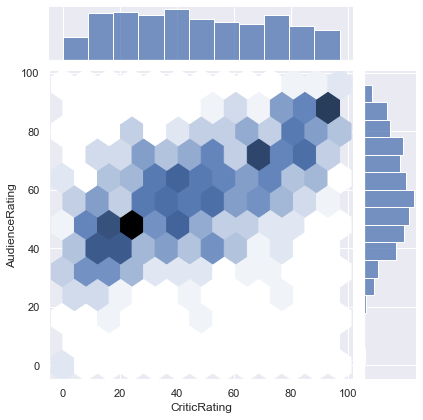

In [7]:
j = sns.jointplot(data = movie_rating, x = 'CriticRating', y = 'AudienceRating', kind = 'hex')

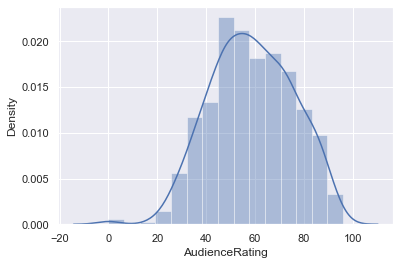

In [8]:
#Histograms
m1 = sns.distplot(movie_rating['AudienceRating'], bins = 15)

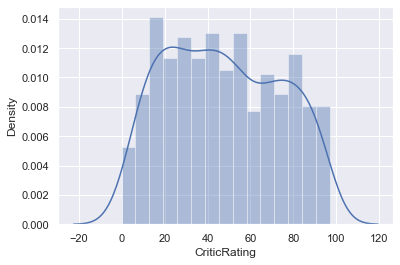

In [9]:
m2 = sns.distplot(movie_rating['CriticRating'], bins = 15)

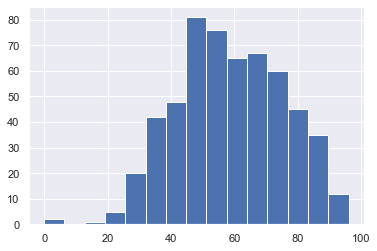

In [10]:
n1 = plt.hist(movie_rating['AudienceRating'], bins = 15)

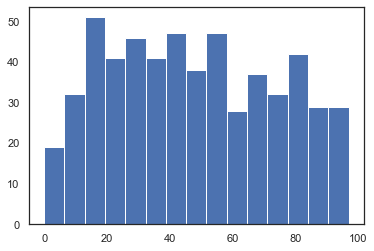

In [11]:
sns.set_style('white')
n2 = plt.hist(movie_rating['CriticRating'], bins = 15)

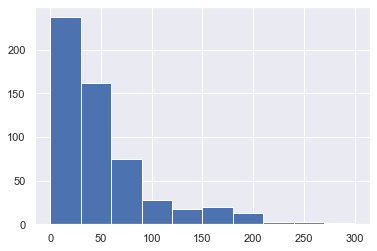

In [12]:
#Stacked Histograms
sns.set_style('darkgrid')
h1 = plt.hist(movie_rating['BudgetMillions'])

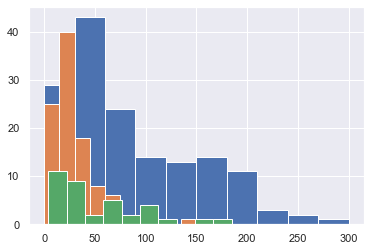

In [13]:
plt.hist(movie_rating[movie_rating.Genre == 'Action']['BudgetMillions'])
plt.hist(movie_rating[movie_rating.Genre == 'Drama']['BudgetMillions'])
plt.hist(movie_rating[movie_rating.Genre == 'Thriller']['BudgetMillions'])
plt.show()

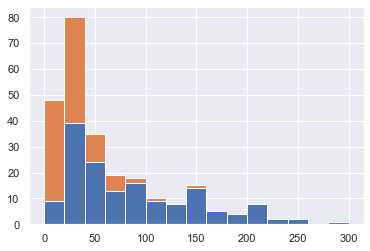

In [14]:
plt.hist([movie_rating[movie_rating.Genre == 'Action']['BudgetMillions'],
          movie_rating[movie_rating.Genre == 'Drama']['BudgetMillions']], bins = 15, stacked = True)
plt.show()

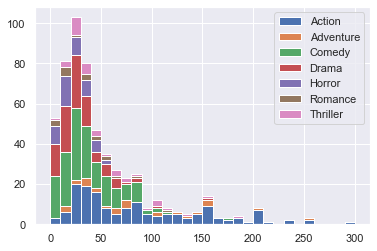

In [15]:
list1 = []
mylabels = []
for gen in movie_rating.Genre.cat.categories:
    list1.append(movie_rating[movie_rating.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
h = plt.hist(list1, bins = 30, stacked = True,rwidth = 1, label = mylabels)
plt.legend()
plt.show()

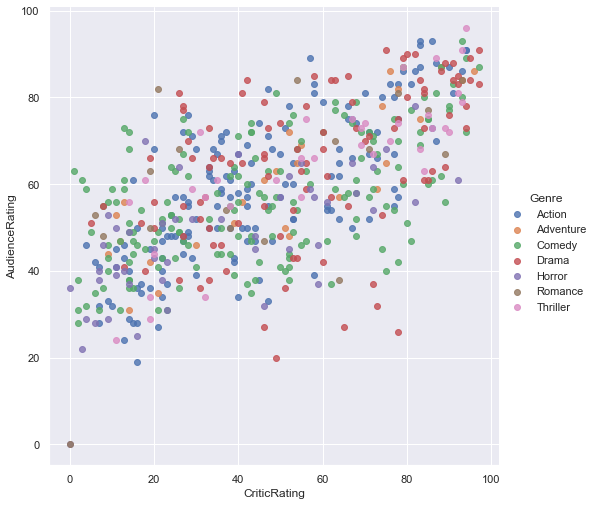

In [16]:
vis1 = sns.lmplot(data = movie_rating, x = 'CriticRating', y = 'AudienceRating',
                 fit_reg = False, hue= 'Genre', size = 7, aspect = 1)

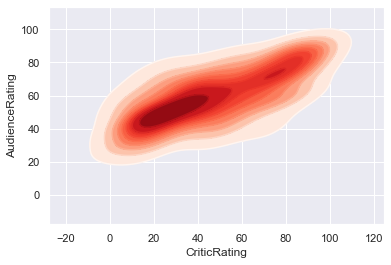

In [17]:
#KDE Plot
k1 = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating,
                shade = True, shade_lowest = False, cmap = 'Reds')

k1b = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating,
                 cmap = 'Reds')

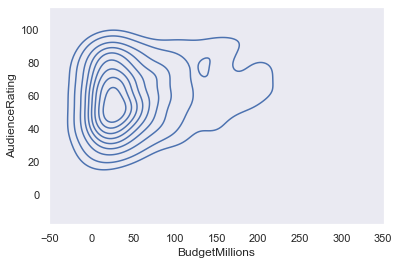

In [18]:
sns.set_style('dark')
k1 = sns.kdeplot(movie_rating.BudgetMillions, movie_rating.AudienceRating)

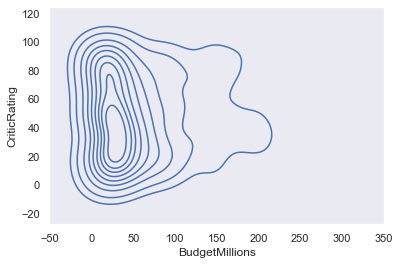

In [19]:
k2 = sns.kdeplot(movie_rating.BudgetMillions, movie_rating.CriticRating)

[(-20.0, 160.0)]

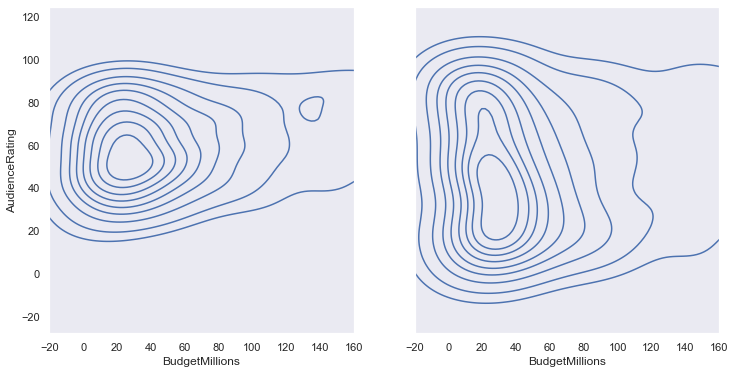

In [20]:
#Working with subplots()
f, axes =plt.subplots(1, 2, figsize = (12, 6), sharex = True, sharey = True)
k1 = sns.kdeplot(movie_rating.BudgetMillions, movie_rating.AudienceRating, ax = axes[0])
k2 = sns.kdeplot(movie_rating.BudgetMillions, movie_rating.CriticRating, ax = axes[1])
k1.set(xlim = (-20, 160))

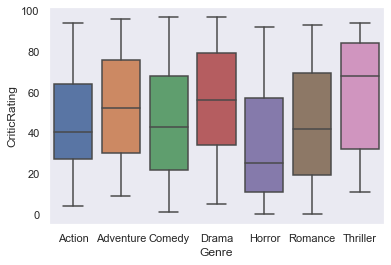

In [21]:
b = sns.boxplot(data = movie_rating, x = 'Genre', y = 'CriticRating')

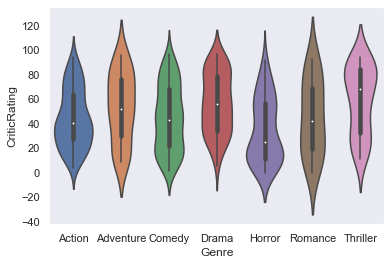

In [22]:
#violinPlots
z = sns.violinplot(data = movie_rating, x = 'Genre', y = 'CriticRating')

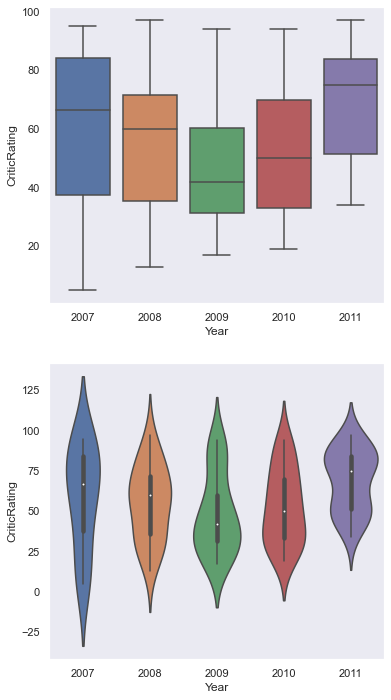

In [23]:
f, axes =plt.subplots(2, 1, figsize = (6, 12))
b1 = sns.boxplot(data = movie_rating[movie_rating.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax = axes[0])
v1 = sns.violinplot(data = movie_rating[movie_rating.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax = axes[1])

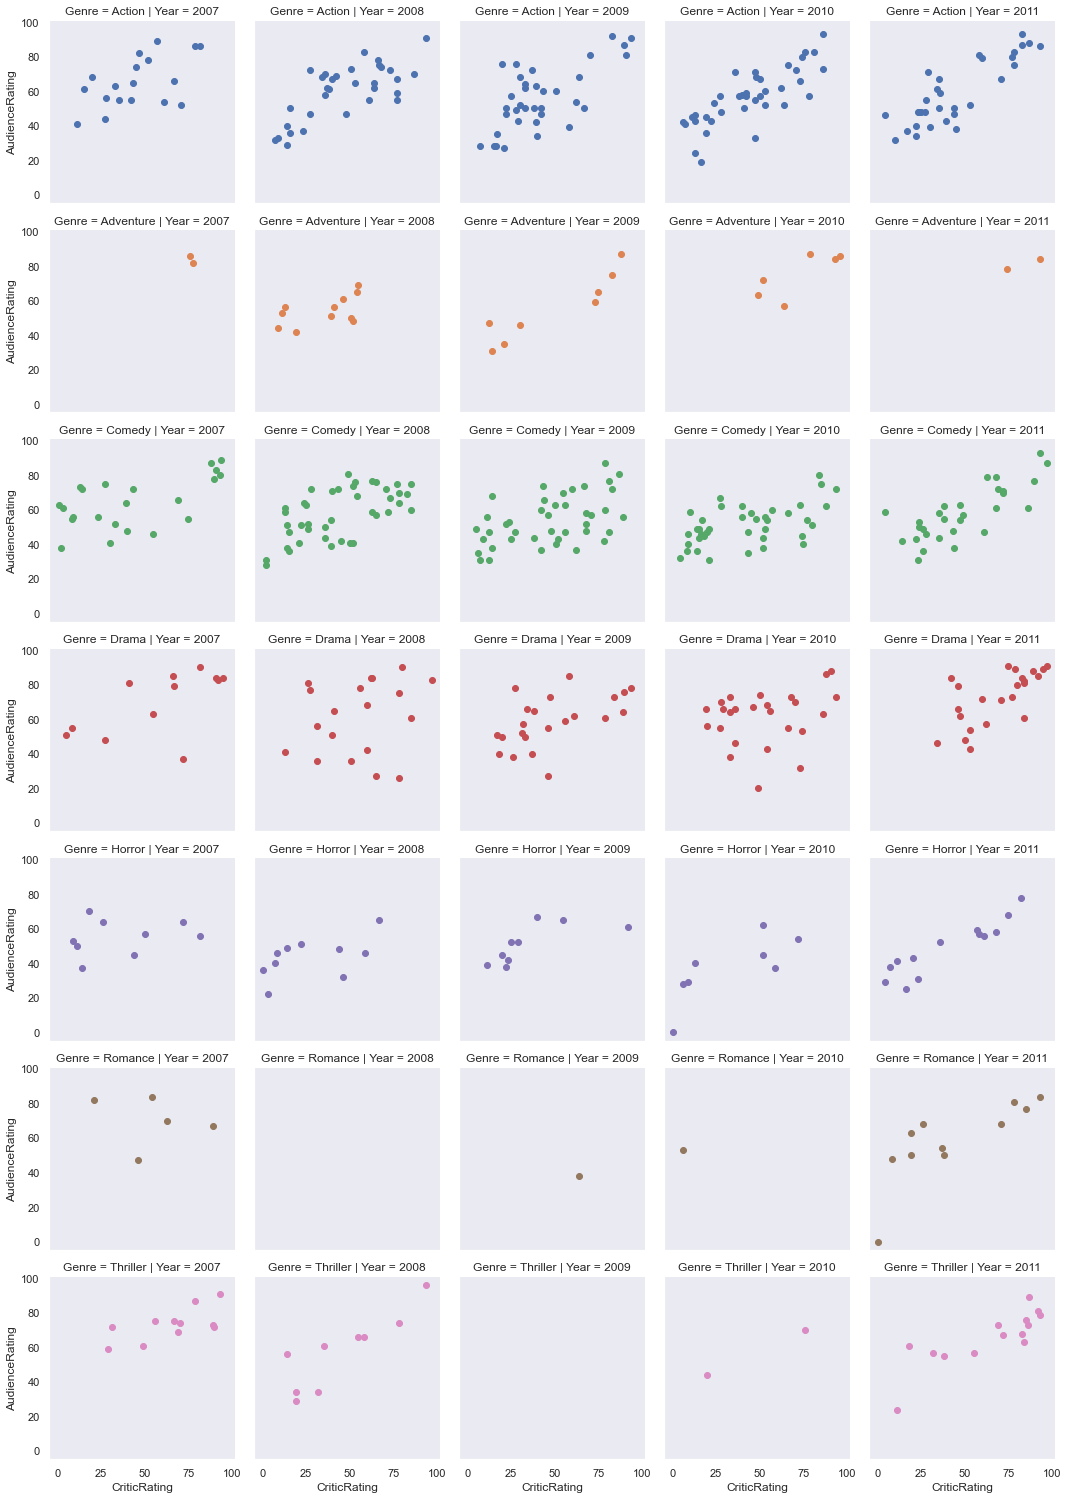

In [24]:
#Facet grid
g = sns.FacetGrid(movie_rating, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

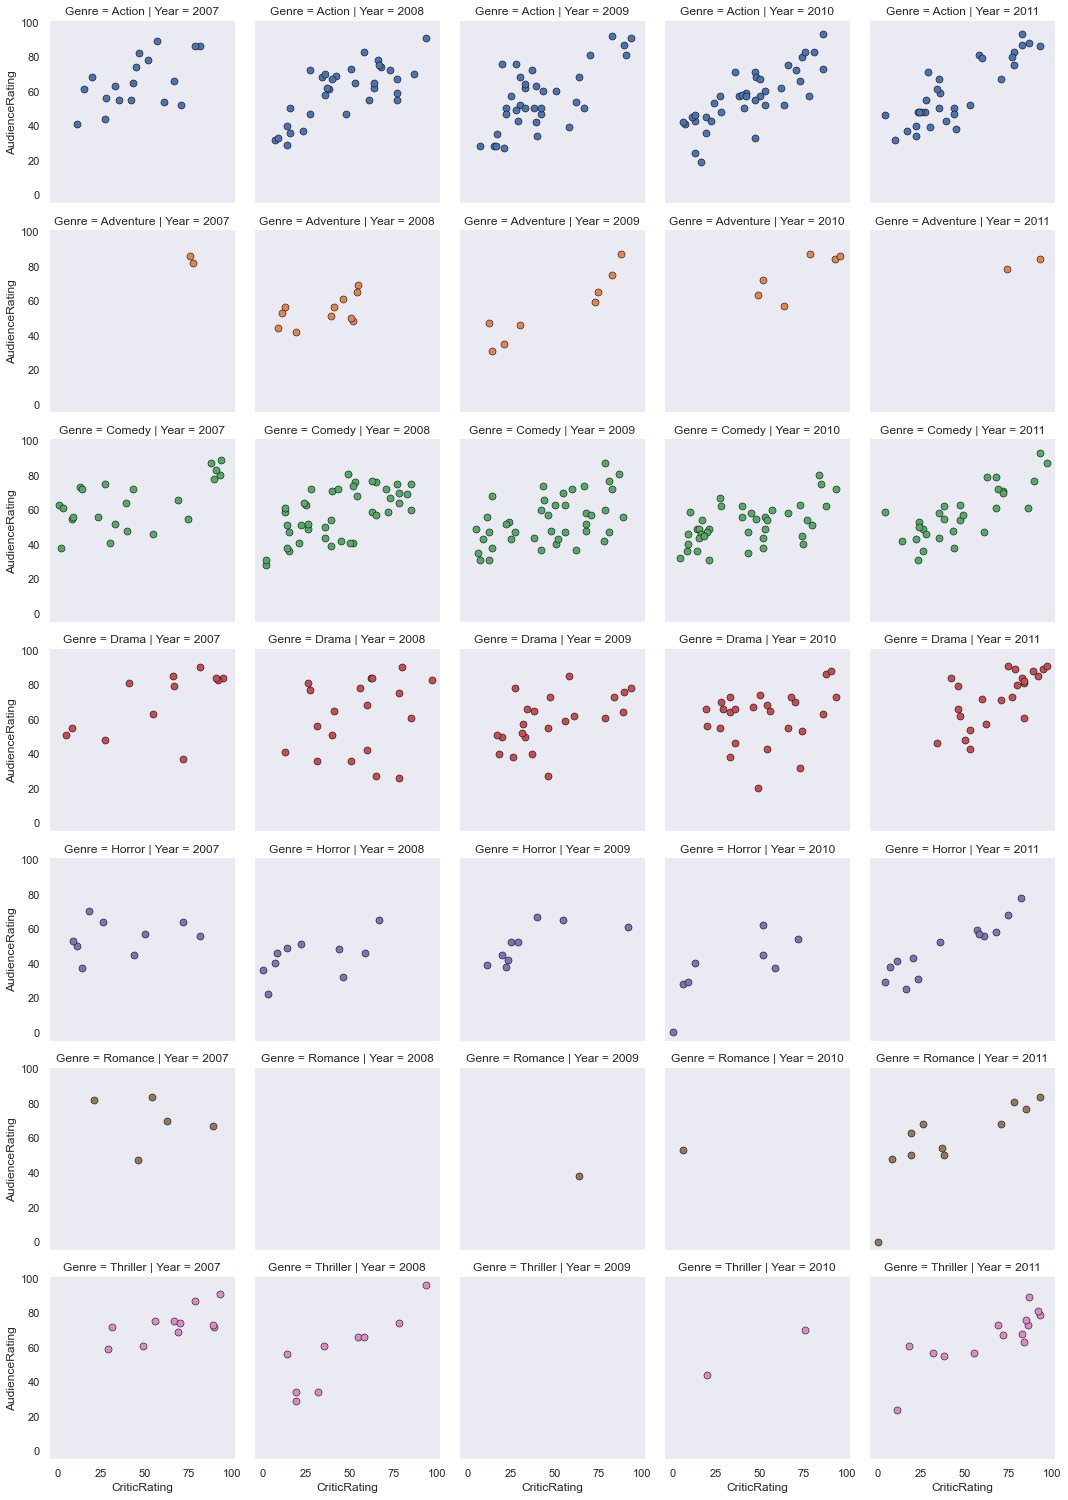

In [25]:
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
g = sns.FacetGrid(movie_rating, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

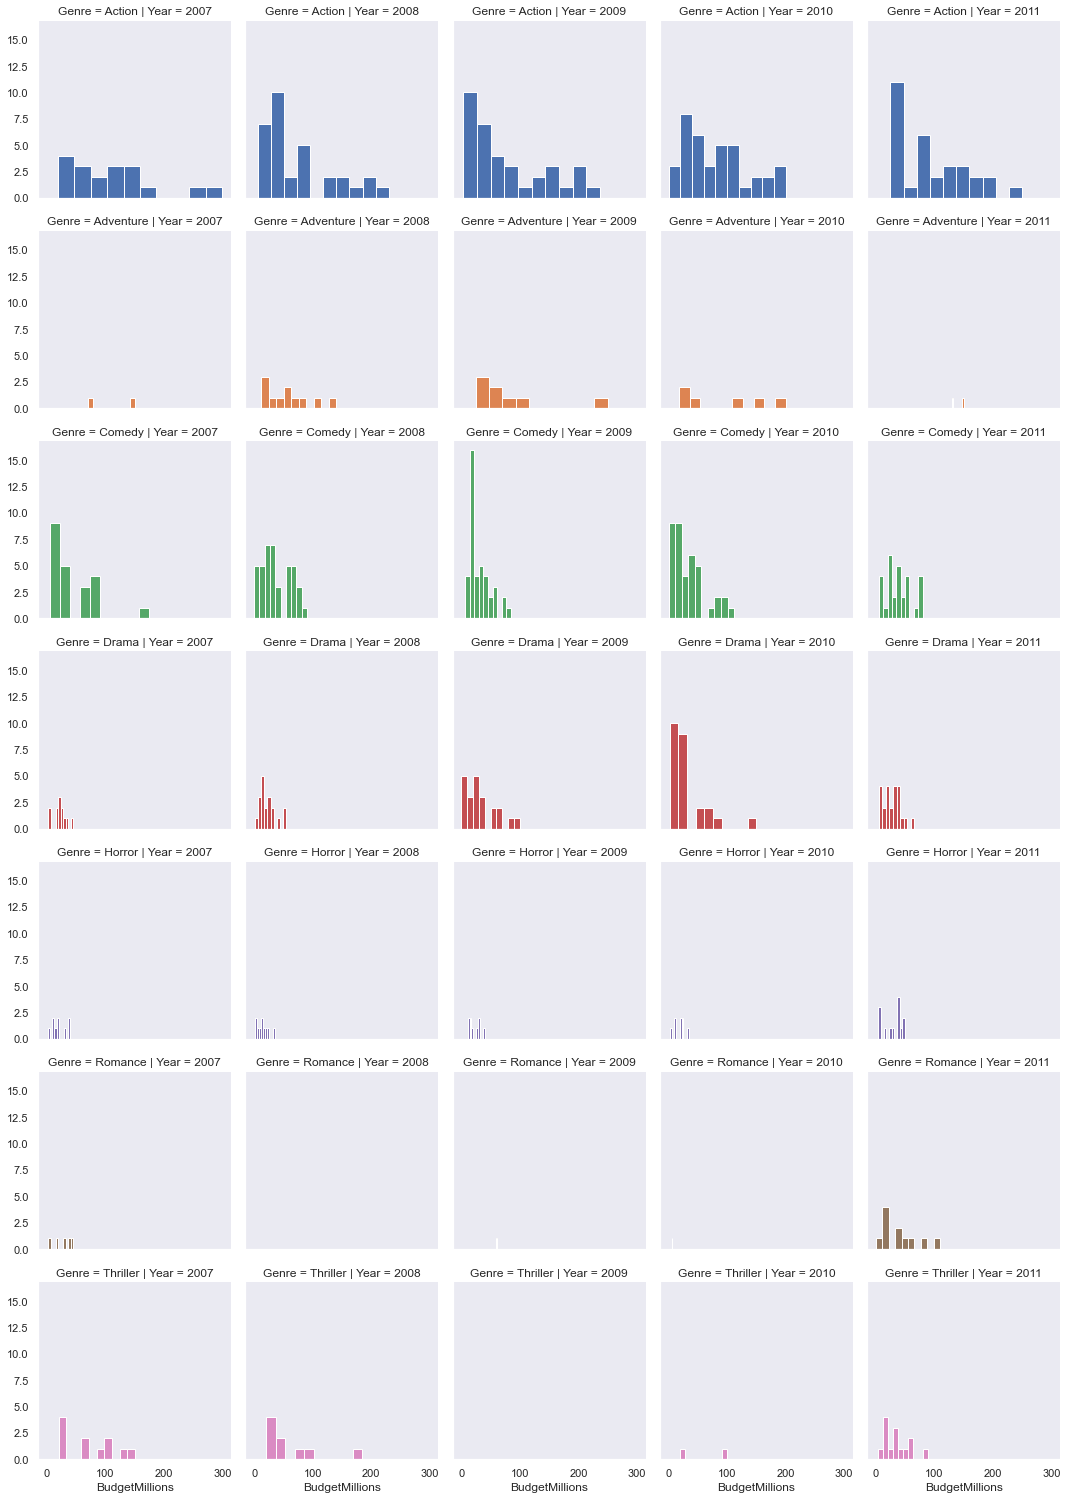

In [26]:
g = sns.FacetGrid(movie_rating, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.hist, 'BudgetMillions')

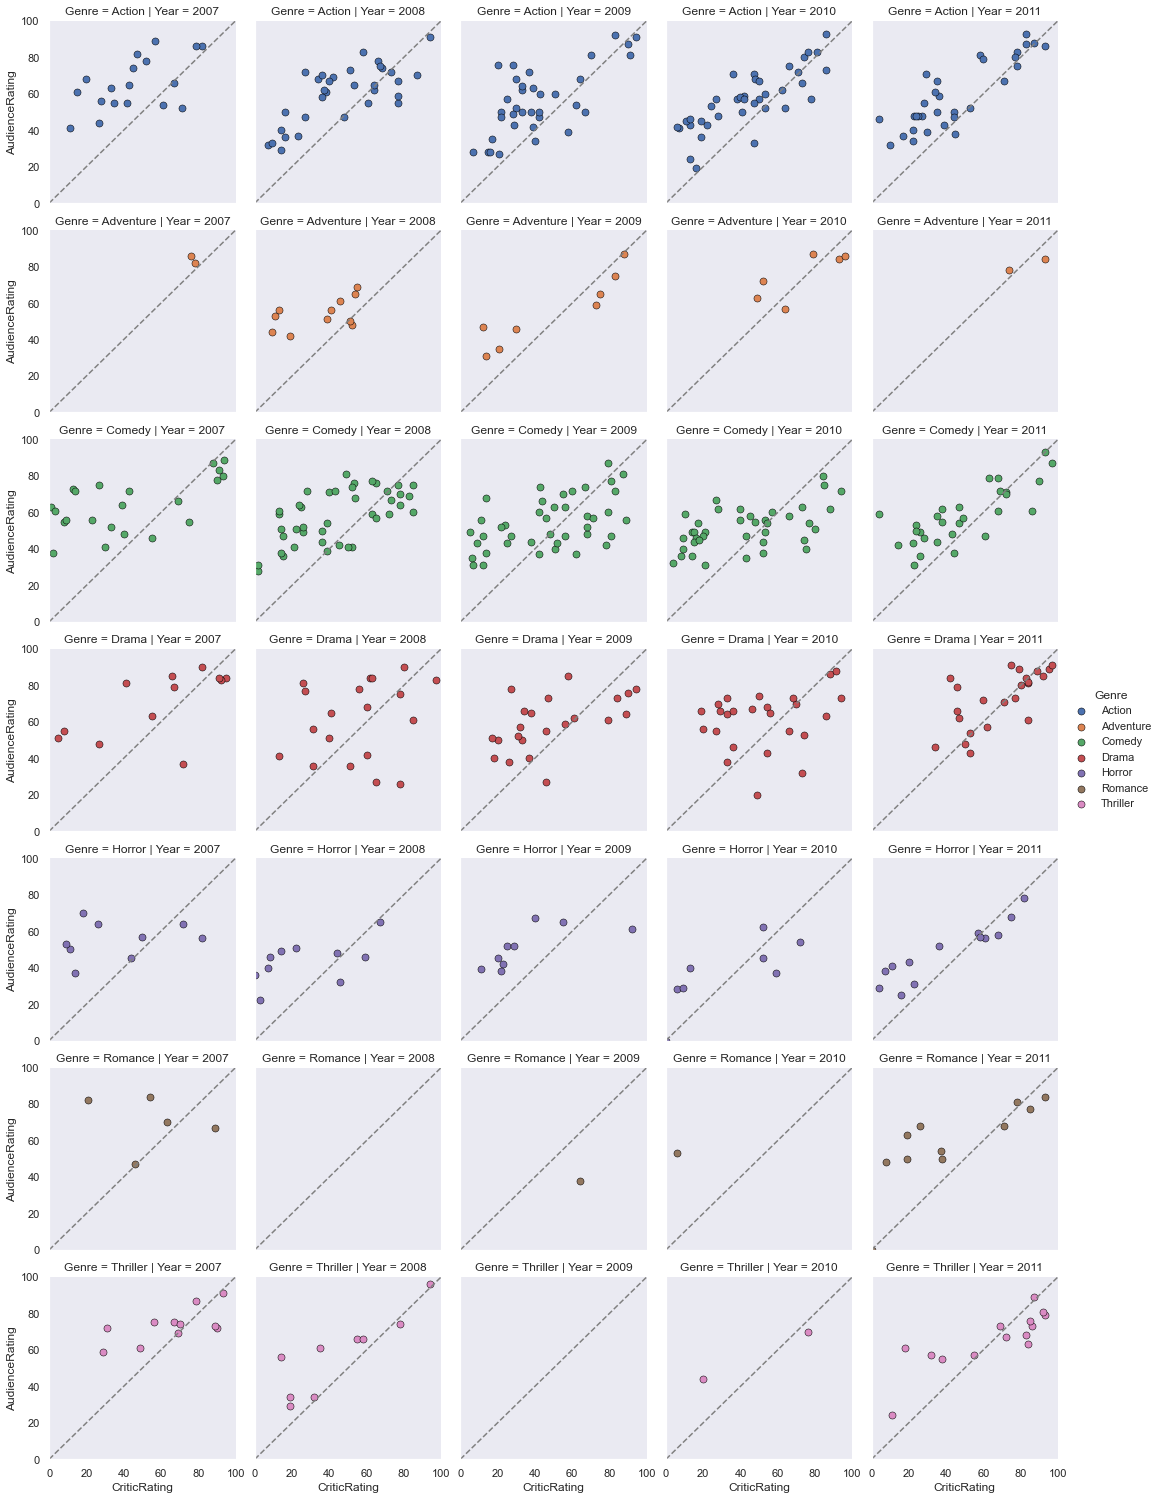

In [27]:
#Controlling Axes and adding diagonals
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
g = sns.FacetGrid(movie_rating, row = 'Genre', col = 'Year', hue = 'Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim = (0, 100), ylim = (0,100))

for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c = 'grey', ls = '--')

g.add_legend()

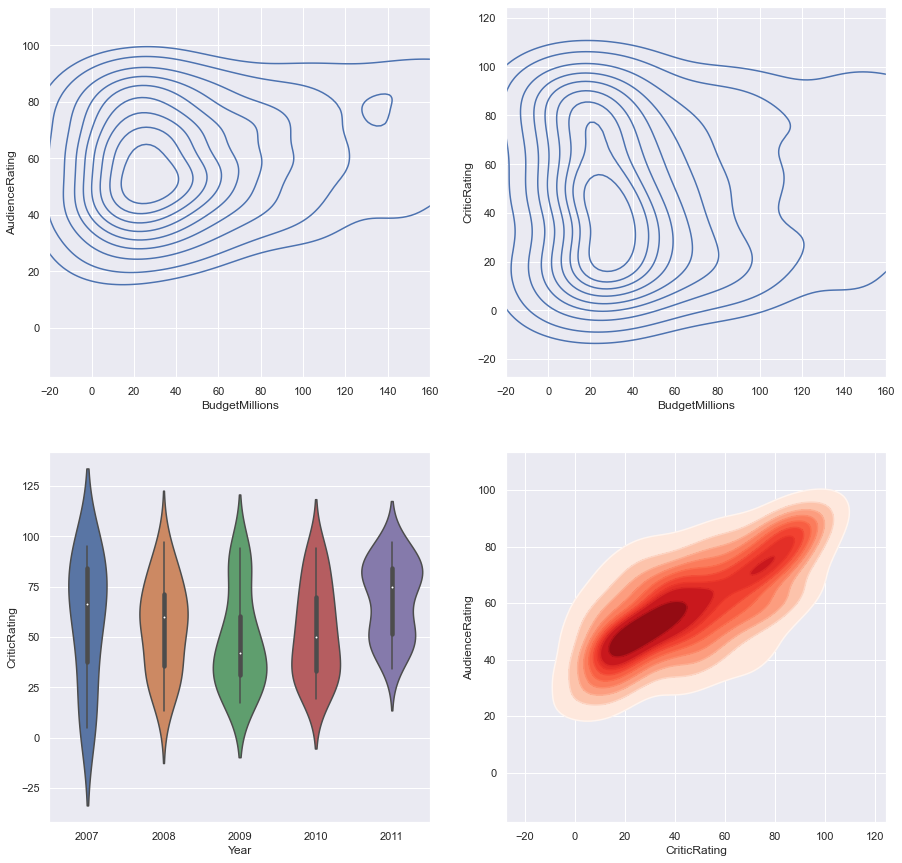

In [28]:
#building dashboard
sns.set_style('darkgrid')
f, axes = plt.subplots(2, 2, figsize = (15, 15))

k1 = sns.kdeplot(movie_rating.BudgetMillions, movie_rating.AudienceRating, ax = axes[0][0])
k2 = sns.kdeplot(movie_rating.BudgetMillions, movie_rating.CriticRating, ax = axes[0][1])
k1.set(xlim = (-20, 160))
k2.set(xlim = (-20, 160))

z = sns.violinplot(data = movie_rating[movie_rating.Genre == 'Drama'], x = 'Year', y = 'CriticRating', ax = axes[1, 0])

k4 = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating, shade = True, shade_lowest = False, cmap = 'Reds', ax = axes[1, 1])

k4b = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating,
                 cmap = 'Reds', ax = axes[1, 1])

plt.show()

In [29]:
#to add a non seaborn plot to dash board use:
# axes[1, 1].hist(movie_rating.CriticRating, bins = 15)

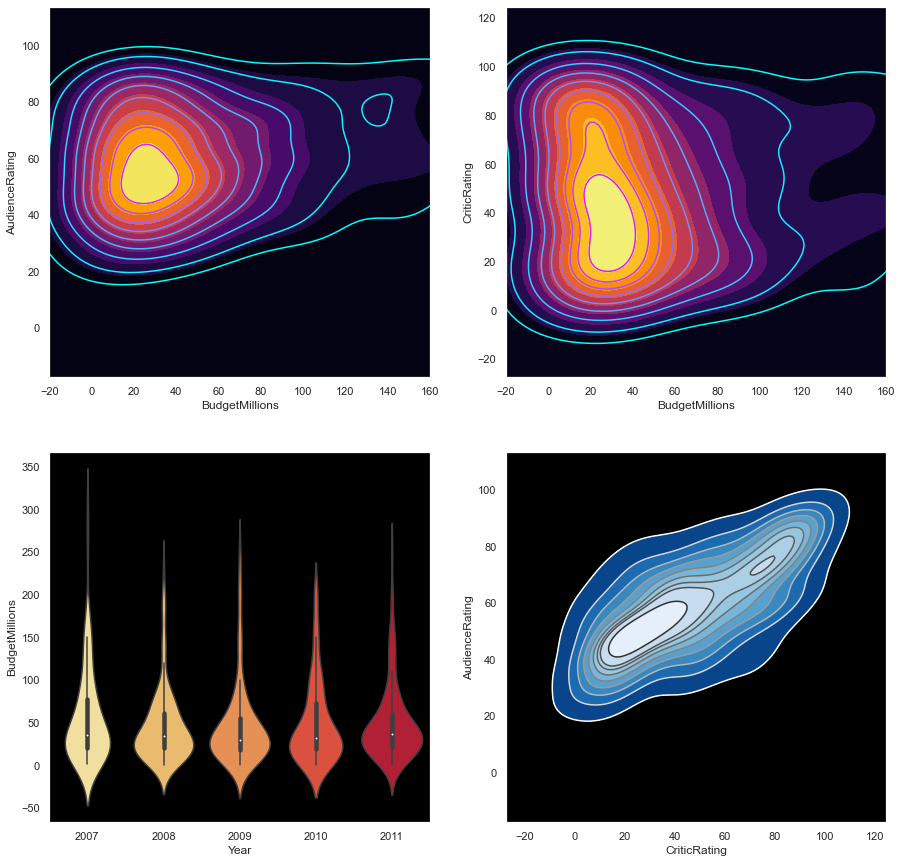

In [30]:
sns.set_style('dark', {'axes.facecolor':'black'})
f, axes = plt.subplots(2, 2, figsize = (15, 15))
#plot 0, 0
k1 = sns.kdeplot(movie_rating.BudgetMillions, movie_rating.AudienceRating, 
                 ax = axes[0][0], shade = True, shade_lowest = True, cmap = 'inferno')
k1b = sns.kdeplot(movie_rating.BudgetMillions, movie_rating.AudienceRating, 
                  ax = axes[0][0], cmap = 'cool')
#plot 0, 1
k2 = sns.kdeplot(movie_rating.BudgetMillions, movie_rating.CriticRating, 
                 shade = True, shade_lowest = True, cmap = 'inferno', ax = axes[0][1])
k2b = sns.kdeplot(movie_rating.BudgetMillions, movie_rating.CriticRating, 
                  cmap = 'cool', ax = axes[0][1])
#plot 1, 0
k3 = sns.violinplot(data = movie_rating, x = 'Year', y = 'BudgetMillions', 
                    palette = 'YlOrRd', ax = axes[1, 0])
#plot 1, 1
k4 = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating, 
                 shade = True, shade_lowest = False, cmap = 'Blues_r', ax = axes[1, 1])
k4b = sns.kdeplot(movie_rating.CriticRating, movie_rating.AudienceRating, 
                  cmap = 'gist_gray_r', ax = axes[1, 1])

k1.set(xlim = (-20, 160))
k2.set(xlim = (-20, 160))
plt.show()

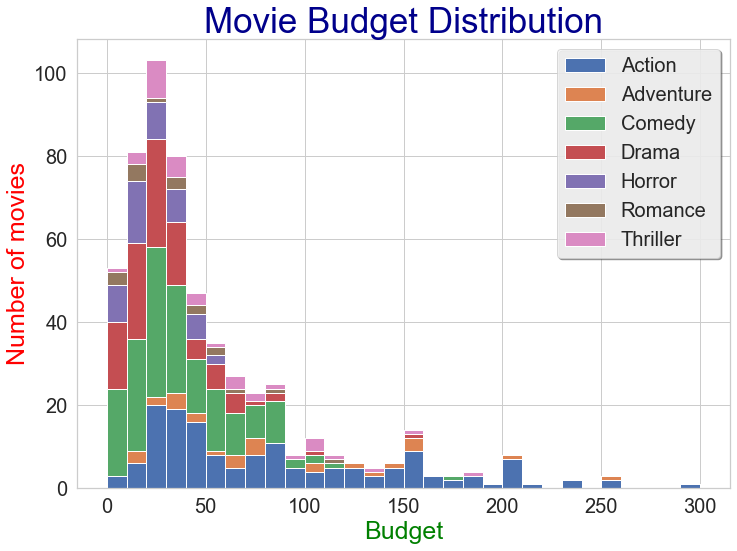

In [48]:
#Thematic edits
list1 = []
mylabels = []
for gen in movie_rating.Genre.cat.categories:
    list1.append(movie_rating[movie_rating.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
sns.set_style("whitegrid")
fig, ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)#size of A4 paper
h = plt.hist(list1, bins = 30, stacked = True,rwidth = 1, label = mylabels)
plt.title("Movie Budget Distribution", fontsize = 35, color = 'DarkBlue')
plt.ylabel("Number of movies", fontsize = 25, color = "Red")
plt.xlabel("Budget", fontsize = 25, color = "Green")
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(frameon = True, fancybox = True, shadow = True, framealpha = 0.8, prop = {'size':20})
plt.show()